In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
class VisBean:
    def __init__(self, token_name, mean, eigs, projection):
        self._token_name= token_name
        self._mean = mean
        self._eigs = eigs
        self._projection = projection
        self._k = np.shape(self._eigs)[0]
        
    def __str__(self):
        return self._token_name

    def get_reconstruction(self):
        Eig = np.matrix(self._eigs)
        rec = np.array(self._projection * Eig + self._mean)
        return np.ravel(rec)


# parse data
years = [2008, 2009, 2010, 2011, 2013, 2014, 2015]
partitions = ['weekday', 'weekend']
projection_columns = [2, 3, 4, 5, 6]
#
base = './data/{}'
year_partition_key_format = '{}_{}'  # year_partition
mean_filename_format = 'total_flow_{}_mean_vector.pivot_{}_grouping_pca_tmp.csv'
eigs_filename_format = 'total_flow_{}_eigenvectors.pivot_{}_grouping_pca_tmp.csv'
eig_values_filename_format = 'total_flow_{}_eigenvalues.pivot_{}_grouping_pca_tmp.csv'
station_filename_format = 'total_flow_{}_agg_transformed.pivot_{}_grouping.csv'
#
visbeans = {}
station_partitions= {}
means= {}
eig_values= {}
eigs_map= {}
for year in years:
    for partition in partitions:
        mean_filename = '/'.join([base.format(partition), mean_filename_format.format(partition, year)])
        eigs_filename = '/'.join([base.format(partition), eigs_filename_format.format(partition, year)])
        eig_values_filename = '/'.join([base.format(partition), eig_values_filename_format.format(partition, year)])
        station_filename = '/'.join([base.format(partition), station_filename_format.format(partition, year)])
        #
        mean = pd.read_csv(mean_filename, header=None).values[0]
        eigs = pd.read_csv(eigs_filename, header=None).values.T  # eigenvectors per row matrix (5 X 288)
        ev = pd.read_csv(eig_values_filename, header=None).values[0]
        stations_df = pd.read_csv(station_filename, header=None)
        #
        year_partition_key= year_partition_key_format.format(year, partition)
        means[year_partition_key]= mean
        eig_values[year_partition_key]= ev
        eigs_map[year_partition_key]= eigs
        #
        stations_list= []
        for _, row in stations_df.iterrows():
            station_id = int(row[0])
            projection = row[projection_columns].values
            #
            stations_list.append(str(station_id))
            #
            visbean = VisBean(year_partition_key, mean, eigs, projection)
            #
            vis_list= []
            if station_id in visbeans:
                vis_list= visbeans[station_id]
            else:
                visbeans[station_id]= vis_list
            vis_list.append(visbean)
        station_partitions[year_partition_key]= sorted(stations_list, key=lambda k: int(k))

In [4]:
def set_xaxis(ax, n_x, xlabel=None, ylabel=None):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

In [5]:
figsize= (16,8)

# Mean Vector

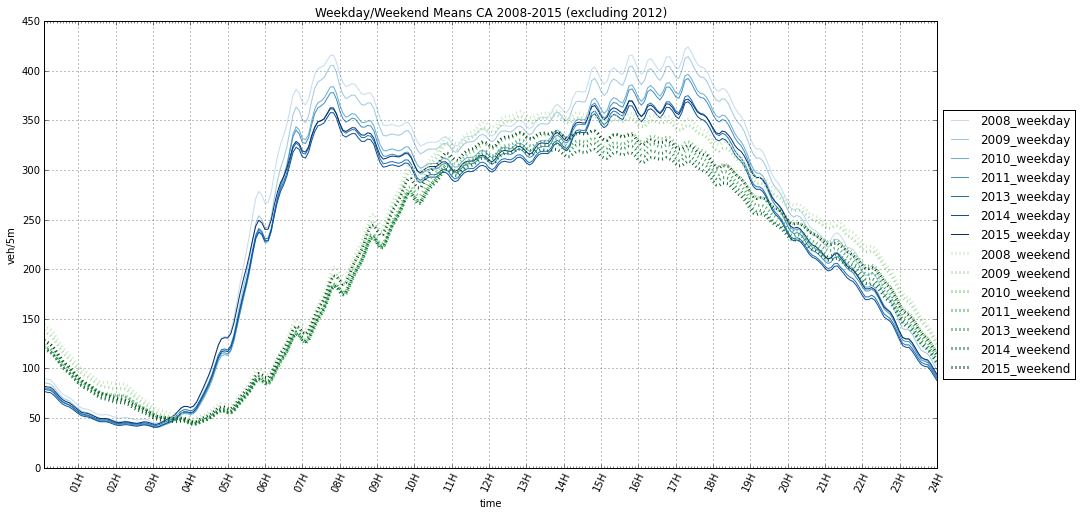

In [6]:
mean_keys= sorted(means.keys())
weekday_colors= ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b'] # blue
weekend_colors= ['#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b'] # green
weekday_keys= []
weekday_values= []
weekend_keys= []
weekend_values= []
for i in xrange(0, len(mean_keys), 2):
    weekday_key= mean_keys[i]
    weekend_key= mean_keys[i + 1]
    #
    v_weekday= means[weekday_key]
    v_weekend= means[weekend_key]
    #
    weekday_keys.append(weekday_key)
    weekend_keys.append(weekend_key)
    weekday_values.append(v_weekday)
    weekend_values.append(v_weekend)

fig, ax= plt.subplots(figsize=figsize)
set_xaxis(ax, len(weekday_values[0]), 'time', 'veh/5m')
ax.set_title("Weekday/Weekend Means CA 2008-2015 (excluding 2012)")
for c, k, v in zip(weekday_colors, weekday_keys, weekday_values):
    ax.plot(v, c=c, label=k, ls='-', lw=1.0) # blue
for c, k, v in zip(weekend_colors, weekend_keys, weekend_values):
    ax.plot(v, c=c, label=k, ls=':', lw=3.0) # green
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Perc. Variance Explained

('2008_weekday', [0, 0.80444388260671706, 0.88223748006719227, 0.91824127570786029, 0.93655368584387899, 0.94638414783823988])
('2009_weekday', [0, 0.82253005239612209, 0.89461679300454433, 0.92696300885040039, 0.94350538191195454, 0.95217497531998563])
('2010_weekday', [0, 0.82886191658163755, 0.89683463551332143, 0.9272712543220204, 0.9439947045146545, 0.95286927395058463])
('2011_weekday', [0, 0.82881334049893174, 0.89518314971009838, 0.92535871177050233, 0.9424377878350626, 0.95167624766788927])
('2013_weekday', [0, 0.81161097316930331, 0.87919141911434717, 0.91206385264714807, 0.93066903567818193, 0.94318787650095604])
('2014_weekday', [0, 0.81190456588482984, 0.87738281938762797, 0.91016905979157992, 0.92884448699800426, 0.94169594702931159])
('2015_weekday', [0, 0.81891237934902583, 0.8835763893018943, 0.91666024982337535, 0.93605362637344425, 0.94687057994414203])
('2008_weekend', [0, 0.88754764750052184, 0.91896763737483655, 0.94375704566626273, 0.951210723246107, 0.9567602523

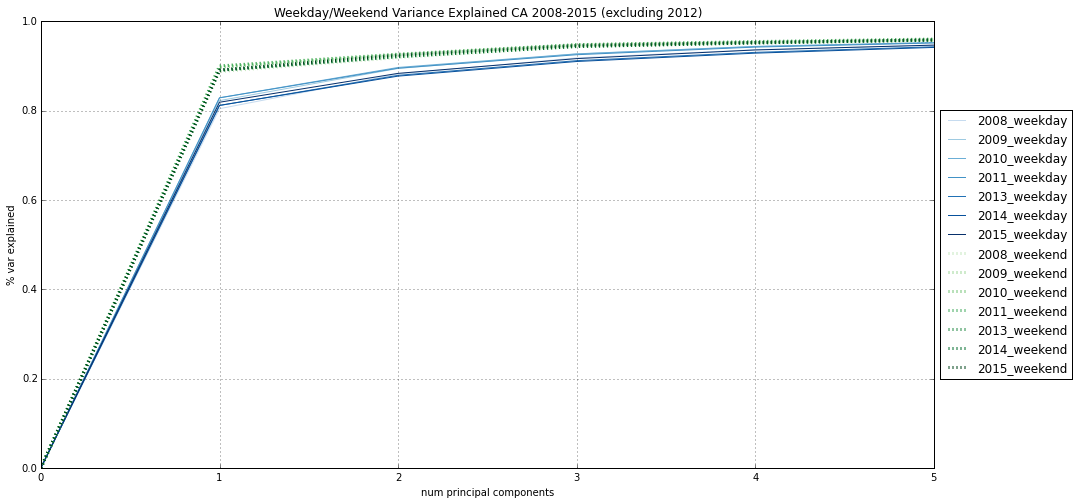

In [7]:
k= 5
ev_keys= sorted(eig_values.keys())
weekday_colors= ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b'] # blue
weekend_colors= ['#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b'] # green
weekday_keys= []
weekday_values= []
weekend_keys= []
weekend_values= []
for i in xrange(0, len(eig_values), 2):
    weekday_key= ev_keys[i]
    weekend_key= ev_keys[i + 1]
    #
    v_weekday= eig_values[weekday_key]
    v_weekend= eig_values[weekend_key]
    v_weekday = ([0, ] + list(np.cumsum(v_weekday[:k])))
    v_weekend = ([0, ] + list(np.cumsum(v_weekend[:k])))
    #
    weekday_keys.append(weekday_key)
    weekend_keys.append(weekend_key)
    weekday_values.append(v_weekday)
    weekend_values.append(v_weekend)

fig, ax= plt.subplots(figsize=figsize)
ax.set_title("Weekday/Weekend Variance Explained CA 2008-2015 (excluding 2012)")
ax.grid()
ax.set_xlabel('num principal components')
ax.set_ylabel('% var explained')

for c, k, v in zip(weekday_colors, weekday_keys, weekday_values):
    print(k, v)
    ax.plot(v, c=c, label=k, ls='-', lw=1.0) # blue
for c, k, v in zip(weekend_colors, weekend_keys, weekend_values):
    print(k, v)
    ax.plot(v, c=c, label=k, ls=':', lw=3.0) # green
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))